In [1]:
import numpy as np; import matplotlib.pyplot as plt
import random

#### In below definations gr denote for the group of spins. 
n: number of spins, f: fraction of spins of up +1, T: the number of iteration

In [49]:
def gr_init(n, f):
    # Initialize the system randomly, n: number of spins, f: fraction of spins of up +1 
    gr = np.zeros(n)-1
    i=0
    n1 = np.int(n*f)
    while i<n1:
        x = random.randint(0,n-1)
        if gr[x]!=1:
            gr[x]=1
            i = i+1
    return gr


def update_gr(gr):
    # update the system 
    n = np.size(gr)
    i = random.randint(0,n-1)
    gr2 = gr
    if gr[i]==gr[(i+1)%n]:
        gr2[(i-1)%n]=gr[i] 
        gr2[(i+2)%n]=gr[i]
    elif gr[i]!=gr[(i+1)%n]:
        gr2[(i-1)%n]=gr[(i+1)%n]
        gr2[(i+2)%n]=gr[i]
    return gr2

def cal_mag(gr):
    # calculate the magnetisation
    n = np.size(gr)
    M = np.sum(gr)/n
    return M

In [84]:
# parameter
n = 30
f = 0.6
T = 1000 # number of iteration

# start the system and updated them T times. The time evolution data is saved in g_t and M_t
g = gr_init(n, f)
g_t = [g]
M = cal_mag(g)
M_t = [M]
for t in range(T-1):
    g = update_group(g)
    M = cal_mag(g)
    g_t = np.append(g_t,[g],axis=0)
    M_t = np.append(M_t,[M],axis=0)

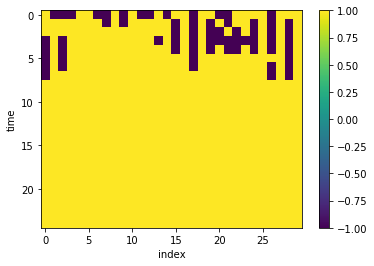

In [88]:
# group of spins versus time. In each time we do 40 update.
plt.imshow(g_t[::40,:])
plt.colorbar()
plt.xlabel('index');plt.ylabel('time')
plt.savefig('all_up.pdf')

C:\Users\YYX\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


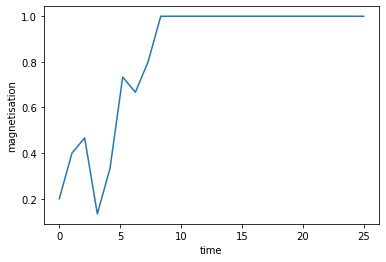

In [87]:
# Magnetisation versus time
plt.plot(np.linspace(0,T,T/40)/40,M_t[::40])
plt.xlabel('time');plt.ylabel('magnetisation')
plt.savefig('M-t_all_up.pdf')